## Peer Assignment
### Sheikh Muhammad Sabih (2303.KHI.DEG.010)
### M Humza Moeen (2303.KHI.DEG.019)

#

Import the required libraries 

In [1]:
#Import the required libraries 

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

Load the Iris datasets

In [2]:
# load dataset
iris = datasets.load_iris()
scaler = StandardScaler()
x = scaler.fit_transform(iris.data)
y = iris.target

Use Elbow method to find optimal number of clusters

In [3]:
k_values = []
intertia_scores = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(iris.data)
    intertia_scores.append(model.inertia_)
    k_values.append(k)
module_of_second_derivative = np.abs(np.diff(np.diff(intertia_scores)))

/home/sabih/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sabih/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sabih/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sabih/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sabih/.local/lib/python3.10/si

Show the Elbow graph

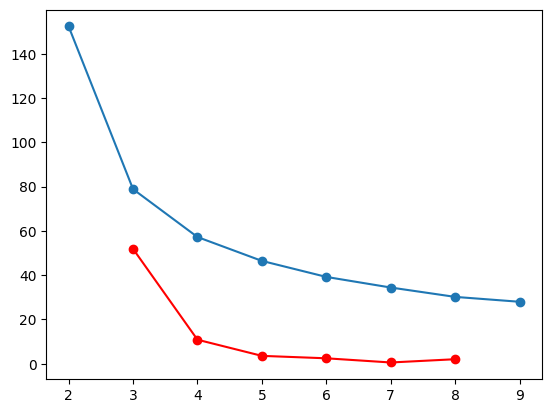

In [4]:
plt.plot(k_values, intertia_scores)
plt.scatter(k_values, intertia_scores)
plt.plot(k_values[1:-1], module_of_second_derivative, color='red')
plt.scatter(k_values[1:-1], module_of_second_derivative, color='red')
plt.show()

### And from plot it is observed the sharp curves appear at k=3

Now, Applying KMean on original dataset

In [5]:
# model implementation
model = KMeans(n_clusters=3, n_init=1, max_iter=100)
model.fit(x)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [6]:
predictions_before_reduced = model.predict(x)
centroids = model.cluster_centers_

Plot the graph

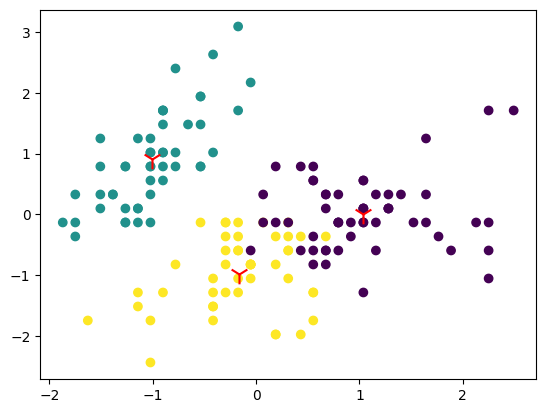

In [7]:
# plot clusters
plt.scatter(x[:,0], x[:,1], c=predictions_before_reduced)
plt.scatter(centroids[:,0], centroids[:,1], marker='1', s=200, c='red')
plt.show()

In [8]:
x.shape

(150, 4)

For performing PCA on original dataset, we have to choose the optimal number of components

Text(0, 0.5, 'cumulative_explained_variance')

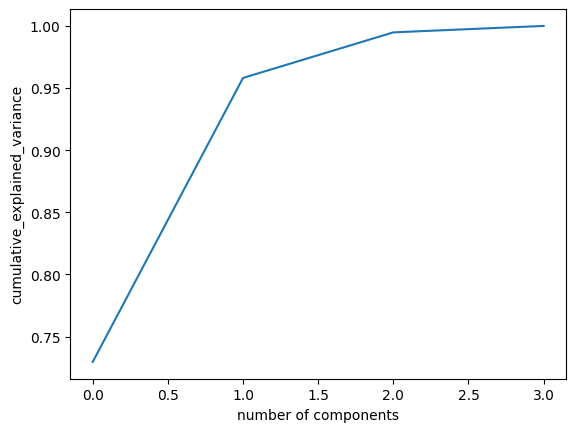

In [9]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative_explained_variance")

We can see that more than 99% of the variance is contained in the first 2 components

#

Applying PCA on Original dataset with two number of components

In [10]:
# dimensionality reduction using PCA
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x)
model = KMeans(n_clusters=3, n_init=1, max_iter=100)
model.fit(x_reduced)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [11]:
predictions_after_reduced = model.predict(x_reduced)
centroids_PCA = model.cluster_centers_

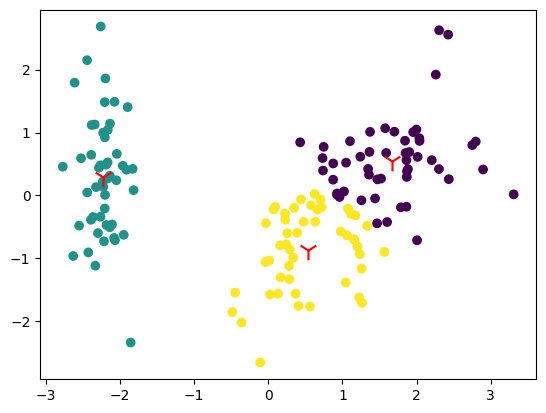

In [12]:
# plot clusters
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=predictions_after_reduced)
plt.scatter(centroids_PCA[:,0], centroids_PCA[:,1], marker='1', s=200, c='red')
plt.show()

In [13]:
x_reduced.shape

(150, 2)

Now comparing both plot before and after PCA using Adjusted_rand_score

In [14]:
adjusted_rand_index =adjusted_rand_score(predictions_before_reduced,predictions_after_reduced)
print(f"Adjusted rand index between original and PCA reduced datasets:{adjusted_rand_index:.2f}")

Adjusted rand index between original and PCA reduced datasets:0.90
